Demonstrate that if we change the survey progress history, the scheduler responds reasonably

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd

from rubin_scheduler.scheduler import sim_runner
from rubin_scheduler.scheduler.model_observatory import ModelObservatory
from rubin_scheduler.scheduler.example import example_scheduler
from rubin_scheduler.scheduler.utils import restore_scheduler

In [2]:
scheduler = example_scheduler()

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/scheduler/surveys/roman_surveys.py:42: UserWarning: Generating Roman survey place holder. Should probably not be in production.
  warnings.warn("Generating Roman survey place holder. Should probably not be in production.")
/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/scheduler/surveys/roman_surveys.py:95: UserWarning: Generating Roman survey place holder. Should probably not be in production.
  warnings.warn("Generating Roman survey place holder. Should probably not be in production.")
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 463 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 463 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', Erf

In [3]:
# Run a sim for 60 days
run_length = 60
mo = ModelObservatory()
mo, orig_scheduler, observations_init60 = sim_runner(mo, scheduler, sim_duration=run_length, verbose=True)


progress = 0.21%

/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/utils/healpy_utils.py:339: RuntimeWarning: All-NaN slice encountered
  indx = np.where(in_map[current_neighbors] == np.nanmax(in_map[current_neighbors]))[0]
/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/utils/healpy_utils.py:342: UserWarning: Can not connect to any more pixels.
  warnings.warn("Can not connect to any more pixels.")


progress = 0.51%

progress = 1.67%

/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/skybrightness_pre/sky_model_pre.py:351: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn("Requested MJD between sunrise and sunset, returning closest maps")


Skipped 0 observations
Flushed 840 observations from queue for being stale
Completed 24135 observations
ran in 3 min = 0.1 hours


In [4]:
# Set up 2 scheduler objects, one with the full observing history, one 
# with the last 2000 observations missing from the history
max_id = np.max(observations_init60["ID"])
scheduler = example_scheduler()
mo = ModelObservatory()

full_sched, _mo = restore_scheduler(max_id, scheduler, mo, observations_init60)

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/scheduler/surveys/roman_surveys.py:42: UserWarning: Generating Roman survey place holder. Should probably not be in production.
  warnings.warn("Generating Roman survey place holder. Should probably not be in production.")
/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/scheduler/surveys/roman_surveys.py:95: UserWarning: Generating Roman survey place holder. Should probably not be in production.
  warnings.warn("Generating Roman survey place holder. Should probably not be in production.")
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 463 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 463 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', Erf

In [5]:
scheduler = example_scheduler()
mo = ModelObservatory()

limited_history_sched, _mo = restore_scheduler(max_id-2000, scheduler, mo, observations_init60)


Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/scheduler/surveys/roman_surveys.py:42: UserWarning: Generating Roman survey place holder. Should probably not be in production.
  warnings.warn("Generating Roman survey place holder. Should probably not be in production.")
/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/scheduler/surveys/roman_surveys.py:95: UserWarning: Generating Roman survey place holder. Should probably not be in production.
  warnings.warn("Generating Roman survey place holder. Should probably not be in production.")
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 463 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 463 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', Erf

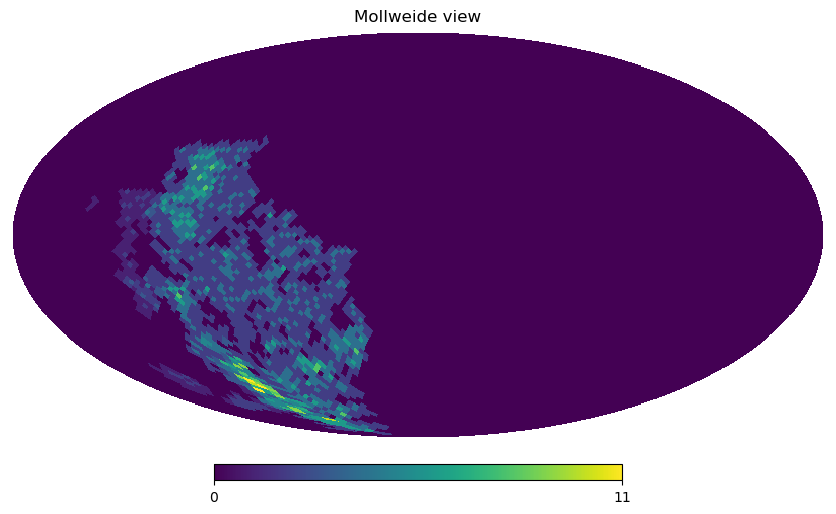

In [6]:
# Confirm that the restored features look different
f1 = full_sched.survey_lists[4][4].basis_functions[2].survey_features["N_obs_all"].feature
f2 = limited_history_sched.survey_lists[4][4].basis_functions[2].survey_features["N_obs_all"].feature
hp.mollview(f1-f2)

#hp.mollview(orig_scheduler.survey_lists[4][4].basis_functions[2].survey_features["N_obs_all"].feature)

In [7]:
mo = ModelObservatory()
mo.mjd = mo.mjd + run_length

mo, _scheduler, obs_full_restore = sim_runner(mo, full_sched, sim_duration=2, verbose=True)

mo = ModelObservatory()
mo.mjd = mo.mjd + run_length

mo, _scheduler, obs_lim_restore = sim_runner(mo, limited_history_sched, sim_duration=2, verbose=True)


progress = 6.53%

/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/skybrightness_pre/sky_model_pre.py:337: UserWarning: Sun high, using bright sky approx
  warnings.warn("Sun high, using bright sky approx")


progress = 51.67%

/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/skybrightness_pre/sky_model_pre.py:351: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn("Requested MJD between sunrise and sunset, returning closest maps")
/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/utils/healpy_utils.py:339: RuntimeWarning: All-NaN slice encountered
  indx = np.where(in_map[current_neighbors] == np.nanmax(in_map[current_neighbors]))[0]
/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/utils/healpy_utils.py:342: UserWarning: Can not connect to any more pixels.
  warnings.warn("Can not connect to any more pixels.")


Skipped 0 observations
Flushed 0 observations from queue for being stale
Completed 442 observations
ran in 0 min = 0.0 hours
Skipped 0 observations
Flushed 0 observations from queue for being stale
Completed 445 observations
ran in 0 min = 0.0 hours


In [8]:
# Now we can see that the scheduler does different things if given a different survey history

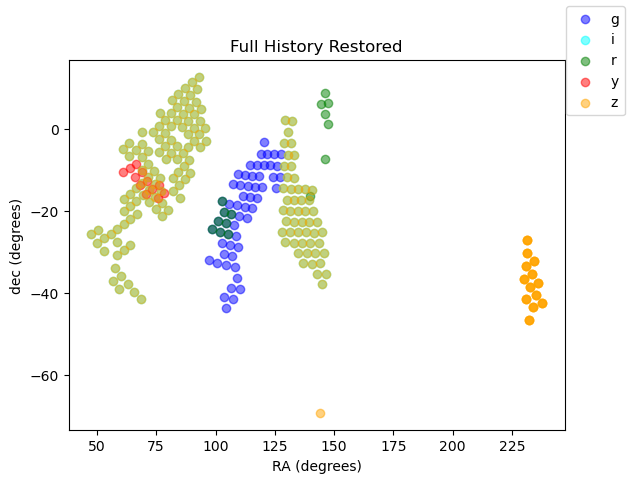

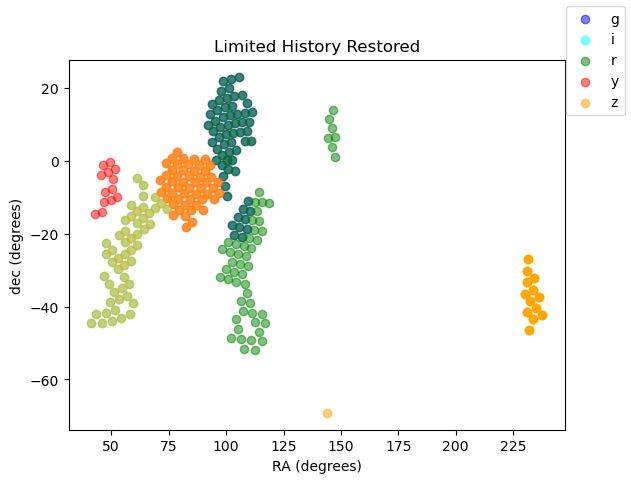

In [9]:
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
fig, ax = plt.subplots()

for bandname in np.unique(obs_full_restore["band"]):
    in_band = np.where(obs_full_restore["band"] == bandname)
    ax.scatter(np.degrees(obs_full_restore["RA"][in_band]),
               np.degrees(obs_full_restore["dec"][in_band]),
               color=f2c[bandname], alpha=0.5, label=bandname)

ax.set_xlabel('RA (degrees)')
ax.set_ylabel('dec (degrees)')
ax.set_title('Full History Restored')

leg = fig.legend()

fig, ax = plt.subplots()

for bandname in np.unique(obs_lim_restore["band"]):
    in_band = np.where(obs_lim_restore["band"] == bandname)
    ax.scatter(np.degrees(obs_lim_restore["RA"][in_band]),
               np.degrees(obs_lim_restore["dec"][in_band]),
               color=f2c[bandname], alpha=0.5, label=bandname)

ax.set_xlabel('RA (degrees)')
ax.set_ylabel('dec (degrees)')
ax.set_title('Limited History Restored')

leg = fig.legend()


So, if we don't restore the entire survey pointing history, the scheduler makes different decisions to compensate for it. But some decisions (like if we should observe near the sun in twilight) stay the same. 